# Name: Mohamed Mohy

# Task2 : Color Identification in Images

In [1]:
# import libraries and modules
import cv2
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

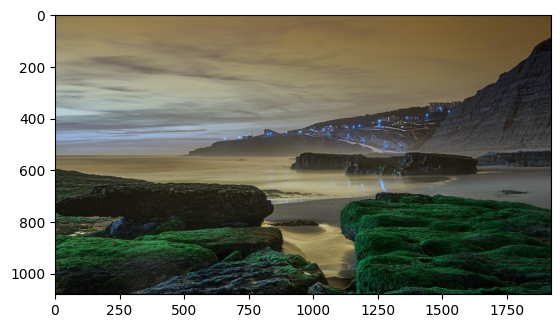

In [2]:
# Read image 
# BGR
image = cv2.imread('img0.jpg')
plt.imshow(image)

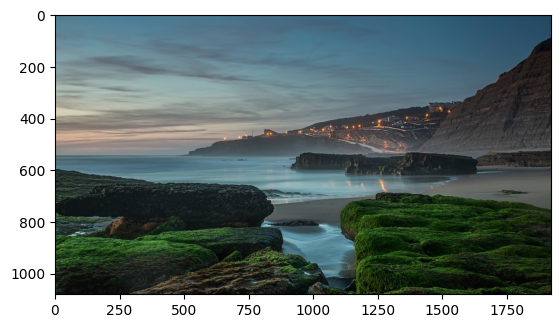

In [3]:
# Converting to RGB to view the image in original colours
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
# Wrappimg the above steps in a single function which load image and convert it to RGB directly
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
# function to Convert RGB to HEX
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
# color identification method
def get_colors(image, number_of_colors, show_chart):
    
    # Resize image and convert it to 2-D 
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    
    # Applying KMeans algorithm
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize=(10,20))
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.title("Color Identification", fontsize=25)
        return rgb_colors

[array([59.11795697, 69.9564448 , 57.65586165]),
 array([ 88.12697512, 122.10675088, 137.984341  ]),
 array([16.15794432, 25.89360461, 16.19040355]),
 array([ 58.57741439,  96.61274687, 118.58253307]),
 array([86.85617317, 92.89118119, 88.74206307]),
 array([165.3994548 , 171.53106378, 163.42614429]),
 array([124.53004304, 142.73205967, 146.11695855]),
 array([36.14827258, 48.36664727, 33.22826835])]

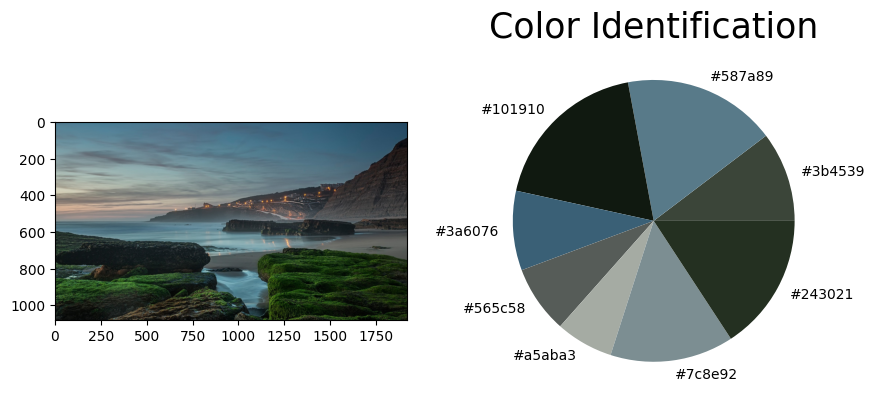

In [7]:
image_path = './img0.jpg'
get_colors(get_image(image_path), 8, True)

In [8]:
# Color identification for a set of images inside a folder
IMAGE_DIRECTORY = r'images'
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

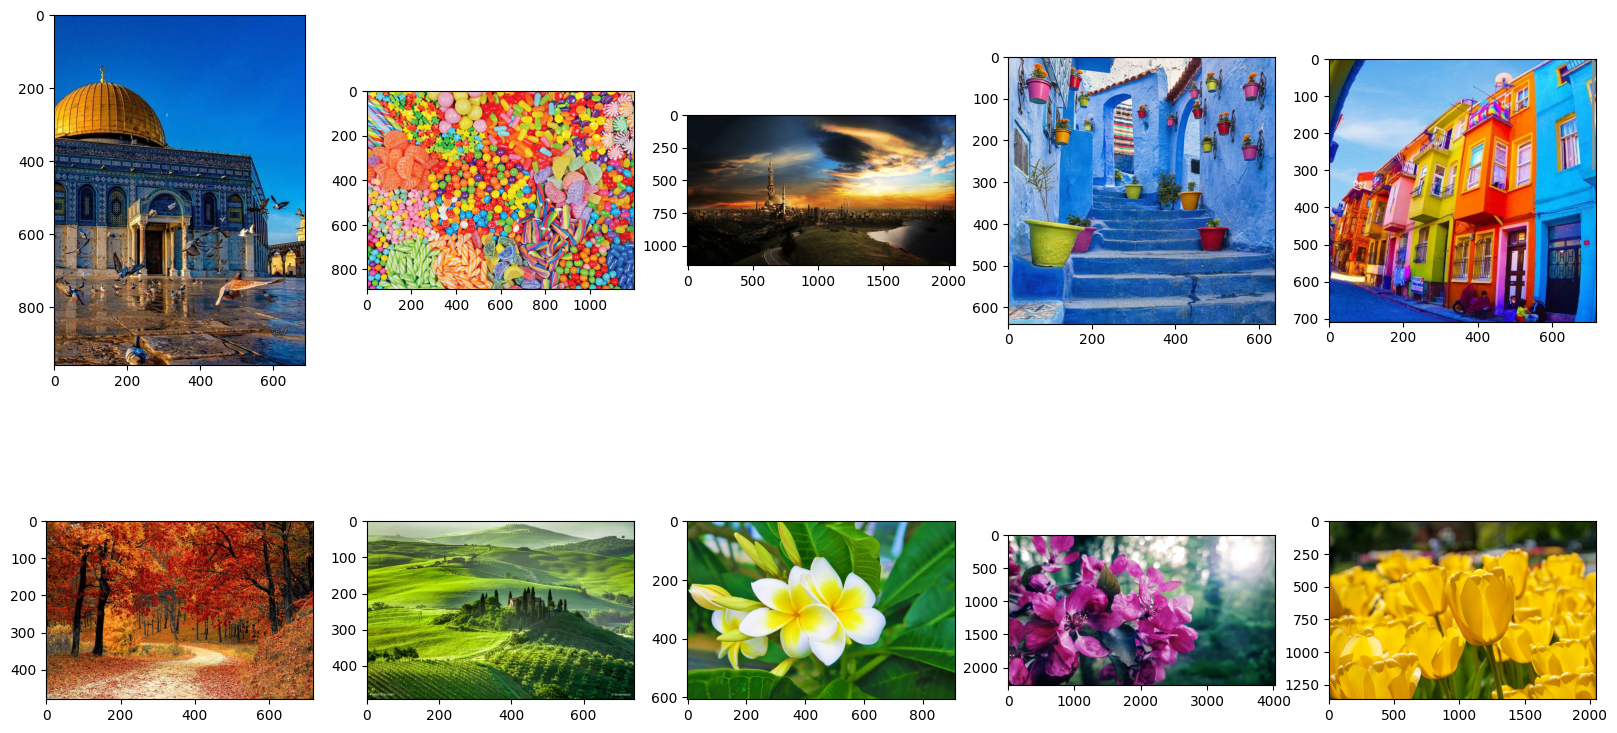

In [9]:
# Viewing images
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(2, len(images)//2, i+1)
    plt.imshow(images[i])

In [10]:
# color identification method for multiple images
def get_colors_mult(images):    
    for i in range(len(images)):
        get_colors(images[i], 8, True)

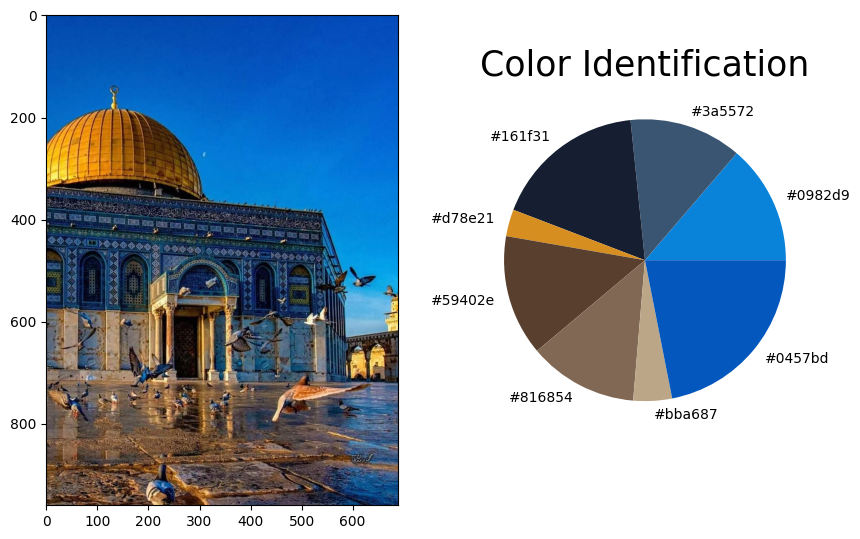

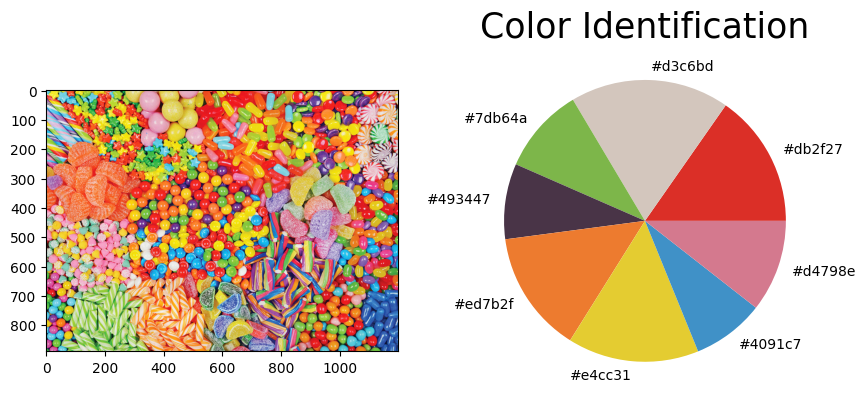

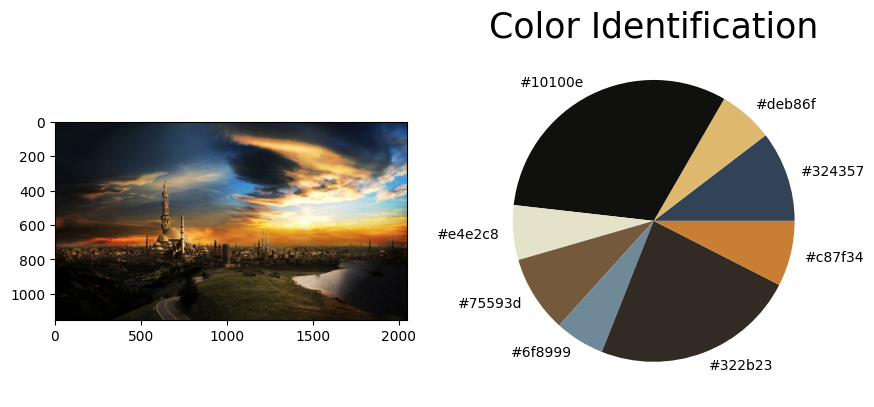

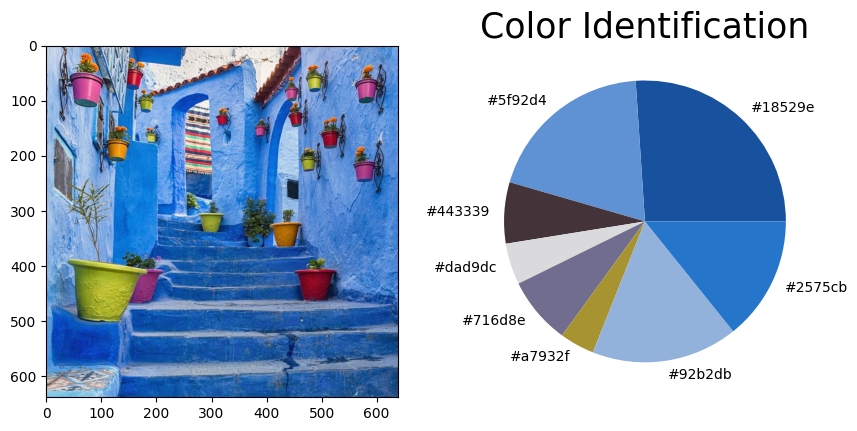

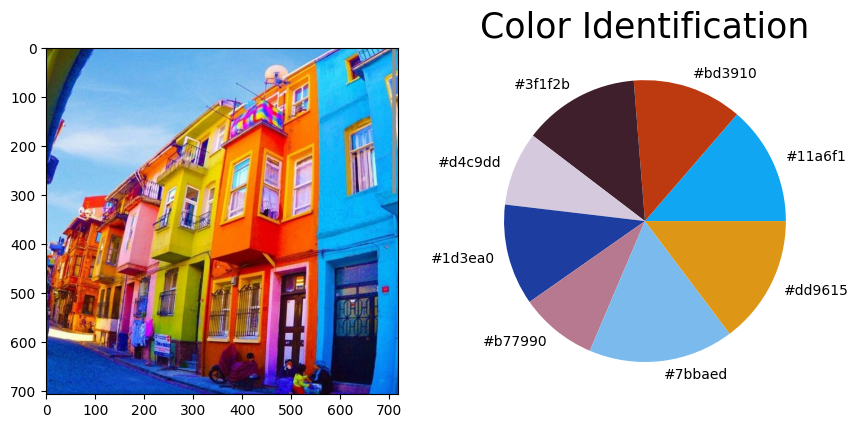

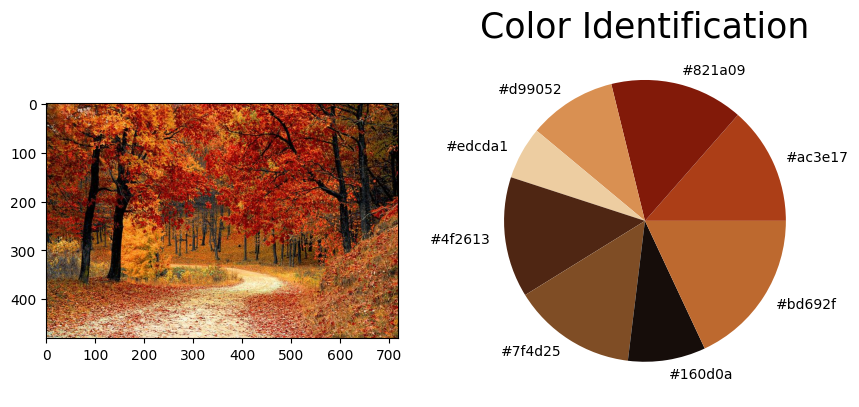

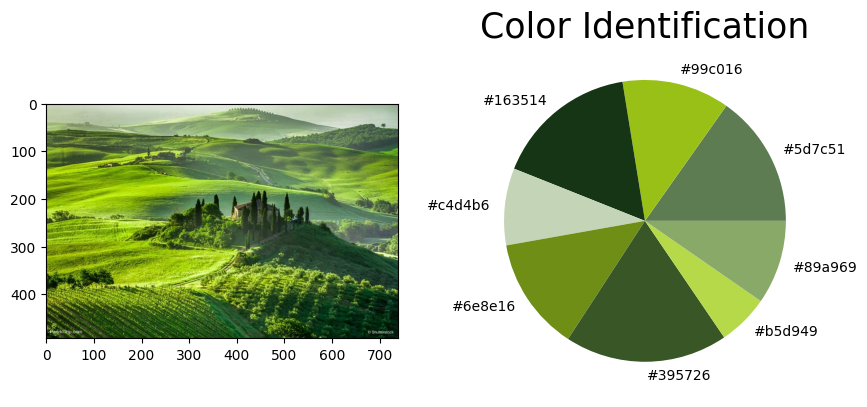

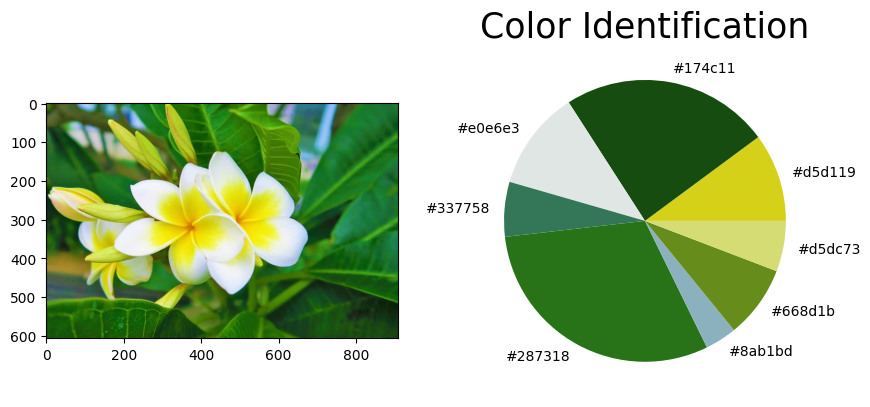

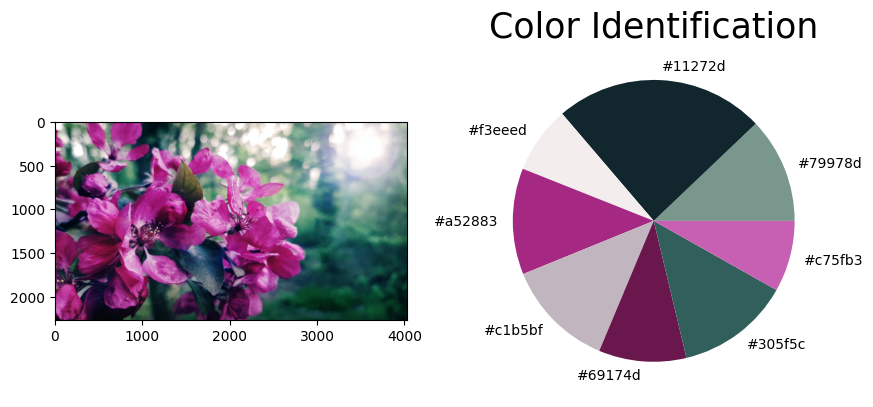

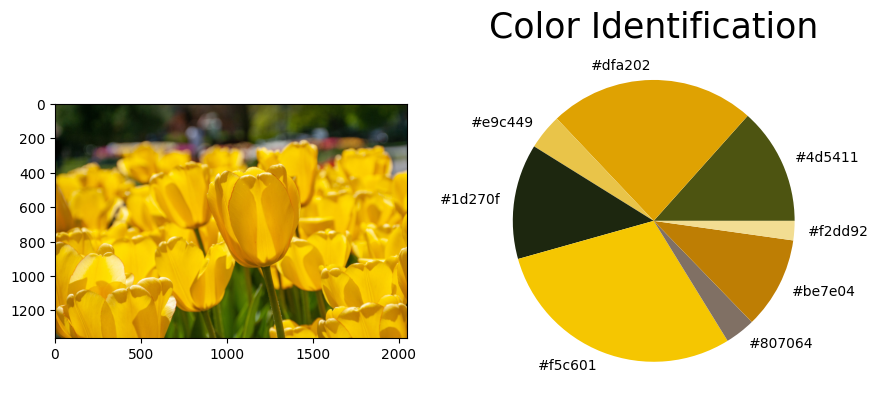

In [11]:
get_colors_mult(images)